# Ariane particle tracks of Baffin Bay

date: 2019-02-20

In [3]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
import matplotlib.cm as cm
#from matplotlib import colors
import numpy.ma as ma
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


Read in the particle tracks from the NetCDF file:

In [4]:
BB = nc.Dataset('/ocean/brogalla/GEOTRACES/Ariane/final_tracks/trajecs/2011-2015.nc')
initx_BB = BB.variables['init_x']
inity_BB = BB.variables['init_y']
initz_BB = BB.variables['init_z']
lon_BB = BB.variables['traj_lon']
lat_BB = BB.variables['traj_lat']
depth_BB = BB.variables['traj_depth']
    
initx_BB = np.array(initx_BB)
inity_BB = np.array(inity_BB)
initz_BB = np.array(initz_BB)
lon_BB = np.array(lon_BB)   
lat_BB = np.array(lat_BB)
depth_BB = np.array(depth_BB)

### Group based on stations: 

Identify the stations read in based on their position:

In [5]:
stn = np.zeros(initx_BB.shape)
for i in range(0,len(initx_BB)):
    if np.abs(initx_BB[i]-560) < 10:
        stn[i] = 1
    elif np.abs(initx_BB[i]-570) < 10:
        stn[i] = 2
    else:
        stn[i] = 3

And create groups based on the depths at which the particles were released:

In [6]:
group_depth = np.zeros(initz_BB.shape)

for i in range(0,len(initz_BB)):
    if initz_BB[i] == 23: # (depth level in the model)
        group_depth[i] = 131 # (corresponding depth in meters)
    elif initz_BB[i] == 24:
        group_depth[i] = 156
    elif initz_BB[i] == 25:
        group_depth[i] = 186
    elif initz_BB[i] == 26:
        group_depth[i] = 222
    elif initz_BB[i] == 27:
        group_depth[i] = 266
    elif initz_BB[i] == 28:
        group_depth[i] = 318
    elif initz_BB[i] == 29:
        group_depth[i] = 380
    elif initz_BB[i] == 30:
        group_depth[i] = 454
    elif initz_BB[i] == 31:
        group_depth[i] = 541
    elif initz_BB[i] == 32:
        group_depth[i] = 643
    elif initz_BB[i] == 33:
        group_depth[i] = 763
    elif initz_BB[i] == 34:
        group_depth[i] = 902
    else:
        group_depth[i] = 0 # not a depth we are interested in

Depths that we are interested in for the tracks:

In [7]:
depth_classes = [186,222,266,318,380,454,541,643,763]

# Classification of tracks:

1. Coastal West Greenland Current
2. Nares Strait
3. Parry Channel
4. Baffin Bay interior
5. West Greenland Current
6. Directly from the Atlantic

In [8]:
BB31 = [3,2,1,1,2,4,5,2,4] # each of these is 1 position and 9 depth levels
BB32 = [3,2,2,1,5,1,2,4,4]
BB33 = [3,3,1,1,2,2,1,4,4]
BB34 = [2,1,3,1,1,2,2,5,2]
BB35 = [2,2,2,1,1,1,2,4,4]
BB36 = [1,3,1,1,2,2,5,4,5]
BB37 = [2,3,2,1,1,2,5,4,4]
BB38 = [1,1,3,5,1,2,2,2,4]
BB39 = [2,3,2,4,1,4,4,5,4]
# transpose matrix so that each of the rows is a depth level and each column is a position
BB3_class = np.ma.transpose(np.stack((BB31, BB32, BB33, BB34, BB35, BB36, BB37, BB38, BB39))) 

In [9]:
BB11 = [1,1,2,5,4,4,4,4,4]
BB12 = [1,2,4,4,5,5,5,2,4]
BB13 = [1,1,4,2,2,3,5,5,4]
BB14 = [2,5,5,6,4,2,4,4,4]
BB15 = [1,1,2,1,2,2,1,4,4]
BB16 = [4,6,1,1,5,1,5,4,4]
BB17 = [2,1,2,1,5,5,2,4,2]
BB18 = [2,4,2,1,4,4,4,4,4]
BB19 = [5,1,5,6,1,4,5,4,4]
BB1_class = np.ma.transpose(np.stack((BB11, BB12, BB13, BB14, BB15, BB16, BB17, BB18, BB19)))

In [10]:
# Calculate the sum of the tracks in each of the categories:

BB3_class_sums = np.zeros((2,5)) 
for classi in range(1,6):
    b1=0
    for j in range(0, 5):
        a1 = sum([i == classi for i in BB3_class[j,:]])
        b1 += a1
    BB3_class_sums[0,classi-1] = b1
    
    b2 = 0
    for j in range(5, 9):
        a2 = sum([i == classi for i in BB3_class[j,:]])
        b2 += a2
    BB3_class_sums[1,classi-1] = b2
    
BB3_class_sums = BB3_class_sums.astype(int)

In [11]:
# Calculate the sum of the tracks in each of the categories:

BB1_class_sums = np.zeros((2,6)) 
for classi in range(1,7):
    b1=0
    for j in range(0, 5):
        a1 = sum([i == classi for i in BB1_class[j,:]])
        b1 += a1
    BB1_class_sums[0,classi-1] = b1
    
    b2 = 0
    for j in range(5, 9):
        a2 = sum([i == classi for i in BB1_class[j,:]])
        b2 += a2
    BB1_class_sums[1,classi-1] = b2
    
BB1_class_sums = BB1_class_sums.astype(int)

In [12]:
# Hex codes for the colours that I use:
colors = ['#029c7a', '#15c3d3', '#086b8a', '#ffcc5c', '#96c95c', '#2c6936']

In [27]:
# function for pie charts:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    if pct < 2:
        a =""
    else:
        a = "{:d}".format(absolute)
    return a

#### Plot these tracks and their classifications (I included pie charts here in case you are interested; not absolutely necessary)

(-1.1010086524359686,
 1.1211815203846038,
 -1.1211815290047245,
 1.1010086528464504)

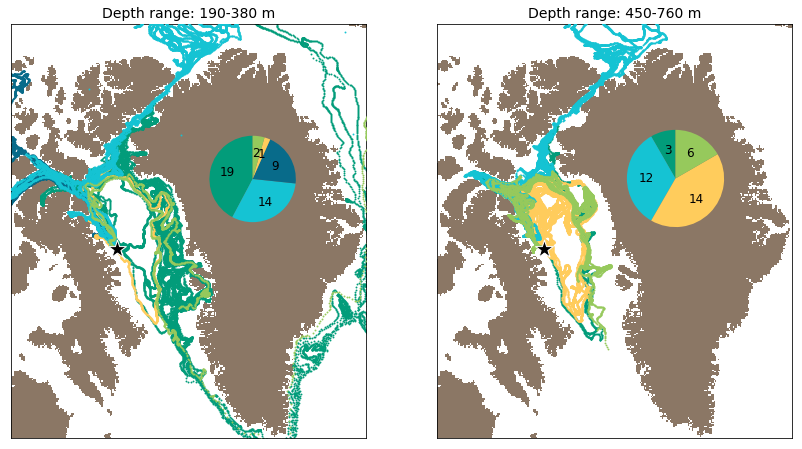

In [28]:
fig, ax = plt.subplots(1,2, figsize=(14,10))

zorders = [1, 3, 2, 2, 4]

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'l')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'l')

i=0
for depth in depth_classes:
    lon1 = lon_BB[:, np.logical_and(group_depth == depth,stn == 3)]
    lat1 = lat_BB[:, np.logical_and(group_depth == depth,stn == 3)]
    
    for run in range(0,9): 
        lon = lon1[:,run]
        lat = lat1[:,run]
        x, y = proj1(lon, lat)
        index_class = BB3_class[i,run]
        if i < 5:
            ax[0].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1]) 
        else:
            ax[1].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1])
    i+=1
    
x_sta,y_sta = proj1(lon1[0,0],lat1[0,0])
ax[0].scatter(x_sta,y_sta, s=350, zorder=5, marker='*', c='k', edgecolors='white')
ax[0].set_title('Depth range: 190-380 m', fontsize=14)
ax[1].scatter(x_sta,y_sta, s=350, zorder=5, marker='*', c='k', edgecolors='white')
ax[1].set_title('Depth range: 450-760 m', fontsize=14)

c1 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[0], edgecolors='none')
c2 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[1], edgecolors='none')
c3 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[2], edgecolors='none')
c4 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[3], edgecolors='none')
c5 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[4], edgecolors='none')

# add pie charts:
sizes1 = [BB3_class_sums[0,0], BB3_class_sums[0,1], BB3_class_sums[0,2], BB3_class_sums[0,3], \
          BB3_class_sums[0,4]]
sizes2 = [BB3_class_sums[1,0], BB3_class_sums[1,1], BB3_class_sums[1,2], BB3_class_sums[1,3], \
          BB3_class_sums[1,4]]

ax1 = fig.add_axes([0.29, 0.5, 0.15, 0.15])
ax1.axis('equal')
ax1.pie(sizes1, colors=colors, autopct=lambda pct: func(pct, sizes1), textprops={'fontsize': 12}, \
       startangle=90)
ax2 = fig.add_axes([0.71, 0.5, 0.15, 0.15])
ax2.pie(sizes2, colors=colors, autopct=lambda pct: func(pct, sizes2), textprops={'fontsize': 12}, \
       startangle=90)
ax2.axis('equal')

# ax[0].legend((c1, c2, c3, c4, c5), (str(BB3_class_sums[0,0]) + '   --- Smith Sound', \
#                                     str(BB3_class_sums[0,1]) + ' --- Nares Strait', \
#                                     str(BB3_class_sums[0,2]) + '   --- Parry Channel', \
#                                     str(BB3_class_sums[0,3]) + '   --- Baffin Bay interior', \
#                                     str(BB3_class_sums[0,4]) + '   --- West Greenland Current'), \
#              loc = (0.05, -0.40), markerscale=10, fontsize=12)
# ax[1].legend((c1, c2, c3, c4, c5), (str(BB3_class_sums[1,0]) + ' --- Smith Sound', \
#                                     str(BB3_class_sums[1,1]) + '   --- Nares Strait', \
#                                     str(BB3_class_sums[1,2]) + '   --- Parry Channel', \
#                                     str(BB3_class_sums[1,3]) + '   --- Baffin Bay interior', \
#                                     str(BB3_class_sums[1,4]) + '   --- West Greenland Current'), \
#              loc = (0.05, -0.40), markerscale=10, fontsize=12)

# fig.savefig('BB3-tracks_20150808.png',bbox_inches='tight')

(-1.1125519068713996,
 1.1118642745918643,
 -1.1100408660614498,
 1.1004781364791167)

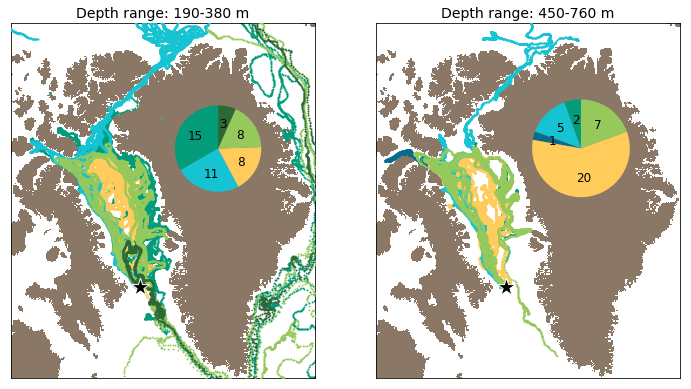

In [29]:
fig, ax = plt.subplots(1,2, figsize=(12,10))

zorders = [1, 3, 2, 2, 4, 5]

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'l')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'l')

i=0
for depth in depth_classes:
    lon1 = lon_BB[:, np.logical_and(group_depth == depth,stn == 1)]
    lat1 = lat_BB[:, np.logical_and(group_depth == depth,stn == 1)]
    
    for run in range(0,9): 
        lon = lon1[:,run]
        lat = lat1[:,run]
        x, y = proj1(lon, lat)
        index_class = BB1_class[i,run]
        if i < 5:
            ax[0].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1])  
        else:
            ax[1].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1])
    i+=1
    
x_sta,y_sta = proj1(lon1[0,0],lat1[0,0])
ax[0].scatter(x_sta,y_sta, s=350, zorder=6, marker='*', c='k', edgecolors='white')
ax[0].set_title('Depth range: 190-380 m', fontsize=14)
ax[1].scatter(x_sta,y_sta, s=350, zorder=6, marker='*', c='k', edgecolors='white')
ax[1].set_title('Depth range: 450-760 m', fontsize=14)

c1 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[0], edgecolors='none')
c2 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[1], edgecolors='none')
c3 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[2], edgecolors='none')
c4 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[3], edgecolors='none')
c5 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[4], edgecolors='none')
c6 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[5], edgecolors='none')

# add pie charts:
sizes1 = [BB1_class_sums[0,0], BB1_class_sums[0,1], BB1_class_sums[0,2], BB1_class_sums[0,3], \
          BB1_class_sums[0,4], BB1_class_sums[0,5]]
sizes2 = [BB1_class_sums[1,0], BB1_class_sums[1,1], BB1_class_sums[1,2], BB1_class_sums[1,3], \
          BB1_class_sums[1,4], BB1_class_sums[1,5]]

ax1 = fig.add_axes([0.29, 0.5, 0.15, 0.15])
ax1.axis('equal')
ax1.pie(sizes1, colors=colors, autopct=lambda pct: func(pct, sizes1), textprops={'fontsize': 12}, \
       startangle=90)
ax2 = fig.add_axes([0.71, 0.5, 0.15, 0.15])
ax2.pie(sizes2, colors=colors, autopct=lambda pct: func(pct, sizes2), textprops={'fontsize': 12}, \
       startangle=90)
ax2.axis('equal')

# ax[0].legend((c1, c2, c3, c4, c5, c6), (str(BB1_class_sums[0,0]) + '   --- Smith Sound', \
#                                     str(BB1_class_sums[0,1]) + ' --- Nares Strait', \
#                                     str(BB1_class_sums[0,2]) + '   --- Parry Channel', \
#                                     str(BB1_class_sums[0,3]) + '   --- Baffin Bay interior', \
#                                     str(BB1_class_sums[0,4]) + '   --- West Greenland Current', \
#                                     str(BB1_class_sums[0,5]) + '   --- Direct from Atlantic'), \
#              loc = (0.05, -0.40), markerscale=10, fontsize=12)
# ax[1].legend((c1, c2, c3, c4, c5, c6), (str(BB1_class_sums[1,0]) + ' --- Smith Sound', \
#                                     str(BB1_class_sums[1,1]) + '   --- Nares Strait', \
#                                     str(BB1_class_sums[1,2]) + '   --- Parry Channel', \
#                                     str(BB1_class_sums[1,3]) + '   --- Baffin Bay interior', \
#                                     str(BB1_class_sums[1,4]) + '   --- West Greenland Current', \
#                                     str(BB1_class_sums[1,5]) + '   --- Direct from Atlantic'), \
#              loc = (0.05, -0.40), markerscale=10, fontsize=12)

# fig.savefig('BB1-tracks_12Feb2019.png',bbox_inches='tight')

In [30]:
# Calculate proportions:
class1_BB1 = (BB1_class_sums[0,0]/45, BB1_class_sums[1,0]/36)
class1_BB3 = (BB3_class_sums[0,0]/45, BB3_class_sums[1,0]/36)
class2_BB1 = (BB1_class_sums[0,1]/45, BB1_class_sums[1,1]/36)
class2_BB3 = (BB3_class_sums[0,1]/45, BB3_class_sums[1,1]/36)
class3_BB1 = (BB1_class_sums[0,2]/45, BB1_class_sums[1,2]/36)
class3_BB3 = (BB3_class_sums[0,2]/45, BB3_class_sums[1,2]/36)
class4_BB1 = (BB1_class_sums[0,3]/45, BB1_class_sums[1,3]/36)
class4_BB3 = (BB3_class_sums[0,3]/45, BB3_class_sums[1,3]/36)
class5_BB1 = (BB1_class_sums[0,4]/45, BB1_class_sums[1,4]/36)
class5_BB3 = (BB3_class_sums[0,4]/45, BB3_class_sums[1,4]/36)
class6_BB1 = (BB1_class_sums[0,5]/45, BB1_class_sums[1,5]/36)

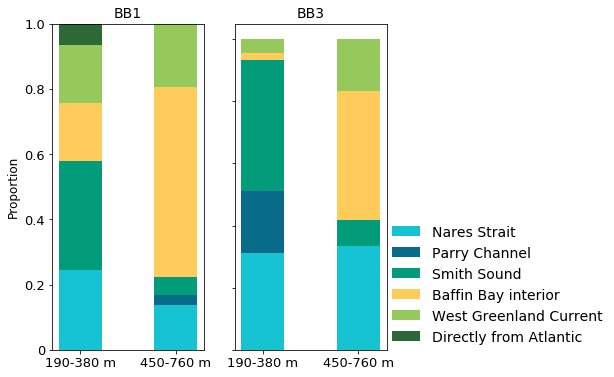

In [31]:
fig, (ax1, ax3) = plt.subplots(1,2,figsize=(6,6), gridspec_kw = {'width_ratios':[1, 1]})

# Setup for bar plot:
N1 = 2
N3 = 2
ind1 = np.arange(N1) 
ind3 = np.arange(N3) 
width = 0.45

#BB1 bar plot:
p1 = ax1.bar(ind1, class2_BB1, width, color=colors[1])
p2 = ax1.bar(ind1, class3_BB1, width, bottom=class2_BB1, color=colors[2])
p3 = ax1.bar(ind1, class1_BB1, width, bottom=np.add(class2_BB1, class3_BB1), color=colors[0])
p4 = ax1.bar(ind1, class4_BB1, width, bottom=np.add(np.add(class3_BB1, class2_BB1),class1_BB1), color=colors[3])
p5 = ax1.bar(ind1, class5_BB1, width, bottom=np.add(np.add(np.add(class4_BB1, class2_BB1), \
                                                             class1_BB1), class3_BB1), color=colors[4])
p6 = ax1.bar(ind1, class6_BB1, width, bottom=np.add(np.add(np.add(np.add(class4_BB1, class2_BB1), \
                                                                    class1_BB1), class3_BB1), class5_BB1),\
             color=colors[5])
#BB3 bar plot:
ax3.bar(ind3, class2_BB3, width, color=colors[1])
ax3.bar(ind3, class3_BB3, width, bottom=class2_BB3, color=colors[2])
ax3.bar(ind3, class1_BB3, width, bottom=np.add(class2_BB3, class3_BB3), color=colors[0])
ax3.bar(ind3, class4_BB3, width, bottom=np.add(np.add(class3_BB3, class2_BB3), class1_BB3), color=colors[3])
ax3.bar(ind3, class5_BB3, width, bottom=np.add(np.add(np.add(class4_BB3, class2_BB3), \
                                                              class1_BB3), class3_BB3), color=colors[4])

# axes labels:
ax1.set_ylabel('Proportion', fontsize=12)
ax1.set_xticks(ind1)
ax1.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0],fontsize=13)
ax1.set_xticklabels(['190-380 m', '450-760 m'], fontsize=13)
ax1.set_title('BB1', fontsize=14)
ax3.set_xticks(ind3)
ax3.set_yticklabels([])
ax3.set_title('BB3', fontsize=14)
ax3.set_xticklabels(['190-380 m', '450-760 m'], fontsize=13)
ax3.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Nares Strait','Parry Channel', 'Smith Sound',\
                                                 'Baffin Bay interior', 'West Greenland Current', \
                                                 'Directly from Atlantic'),\
           framealpha=0, fontsize=14, loc=(1,0))

# fig.savefig('proportions_BB1-BB3_20150808.png',bbox_inches='tight')

# BB1:

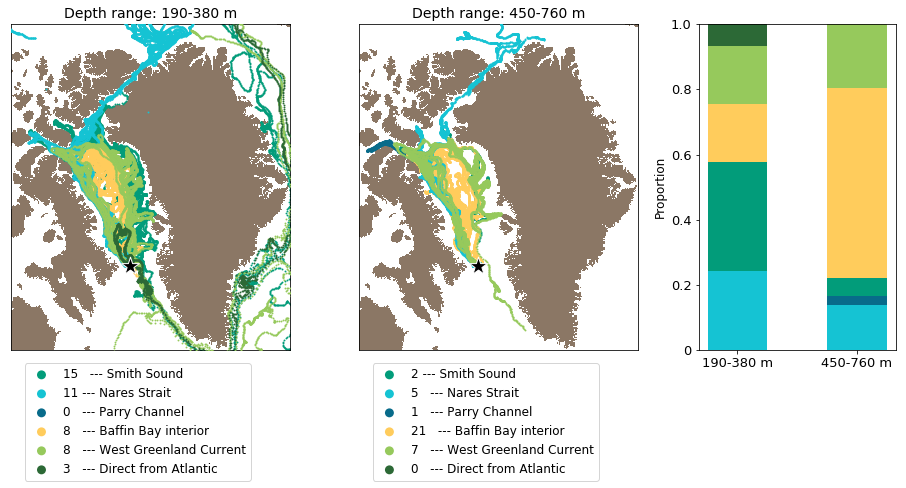

In [149]:
fig, ax = plt.subplots(1,3, figsize=(16,6), gridspec_kw = {'width_ratios':[3,3,2]})

zorders = [1, 3, 2, 2, 4, 5]

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'l')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'l')

i=0
for depth in depth_classes:
    lon1 = lon_BB[:, np.logical_and(group_depth == depth,stn == 1)]
    lat1 = lat_BB[:, np.logical_and(group_depth == depth,stn == 1)]
    
    for run in range(0,9): 
        lon = lon1[:,run]
        lat = lat1[:,run]
        x, y = proj1(lon, lat)
        index_class = BB1_class[i,run]
        if i < 5:
            ax[0].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1])  
        else:
            ax[1].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1])
    i+=1
    
x_sta,y_sta = proj1(lon1[0,0],lat1[0,0])
ax[0].scatter(x_sta,y_sta, s=350, zorder=6, marker='*', c='k', edgecolors='white')
ax[0].set_title('Depth range: 190-380 m', fontsize=14)
ax[1].scatter(x_sta,y_sta, s=350, zorder=6, marker='*', c='k', edgecolors='white')
ax[1].set_title('Depth range: 450-760 m', fontsize=14)

c1 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[0], edgecolors='none')
c2 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[1], edgecolors='none')
c3 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[2], edgecolors='none')
c4 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[3], edgecolors='none')
c5 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[4], edgecolors='none')
c6 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[5], edgecolors='none')

# Setup for bar plot:
N1 = 2
ind1 = np.arange(N1) 
width = 0.5

#BB1 bar plot:
p1 = ax[2].bar(ind1, class2_BB1, width, color=colors[1])
p2 = ax[2].bar(ind1, class3_BB1, width, bottom=class2_BB1, color=colors[2])
p3 = ax[2].bar(ind1, class1_BB1, width, bottom=np.add(class2_BB1, class3_BB1), color=colors[0])
p4 = ax[2].bar(ind1, class4_BB1, width, bottom=np.add(np.add(class3_BB1, class2_BB1),class1_BB1), color=colors[3])
p5 = ax[2].bar(ind1, class5_BB1, width, bottom=np.add(np.add(np.add(class4_BB1, class2_BB1), \
                                                             class1_BB1), class3_BB1), color=colors[4])
p6 = ax[2].bar(ind1, class6_BB1, width, bottom=np.add(np.add(np.add(np.add(class4_BB1, class2_BB1), \
                                                                    class1_BB1), class3_BB1), class5_BB1),\
             color=colors[5])
# axes labels:
ax[2].set_ylabel('Proportion', fontsize=12)
ax[2].set_xticks(ind1)
ax[2].set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0],fontsize=13)
ax[2].set_xticklabels(['190-380 m', '450-760 m'], fontsize=13)


ax[0].legend((c1, c2, c3, c4, c5, c6), (str(BB1_class_sums[0,0]) + '   --- Smith Sound', \
                                    str(BB1_class_sums[0,1]) + ' --- Nares Strait', \
                                    str(BB1_class_sums[0,2]) + '   --- Parry Channel', \
                                    str(BB1_class_sums[0,3]) + '   --- Baffin Bay interior', \
                                    str(BB1_class_sums[0,4]) + '   --- West Greenland Current', \
                                    str(BB1_class_sums[0,5]) + '   --- Direct from Atlantic'), \
             loc = (0.05, -0.40), markerscale=10, fontsize=12)
ax[1].legend((c1, c2, c3, c4, c5, c6), (str(BB1_class_sums[1,0]) + ' --- Smith Sound', \
                                    str(BB1_class_sums[1,1]) + '   --- Nares Strait', \
                                    str(BB1_class_sums[1,2]) + '   --- Parry Channel', \
                                    str(BB1_class_sums[1,3]) + '   --- Baffin Bay interior', \
                                    str(BB1_class_sums[1,4]) + '   --- West Greenland Current', \
                                    str(BB1_class_sums[1,5]) + '   --- Direct from Atlantic'), \
             loc = (0.05, -0.40), markerscale=10, fontsize=12)

# fig.savefig('BB1-tracks_12Feb2019.png',bbox_inches='tight')

# BB3:

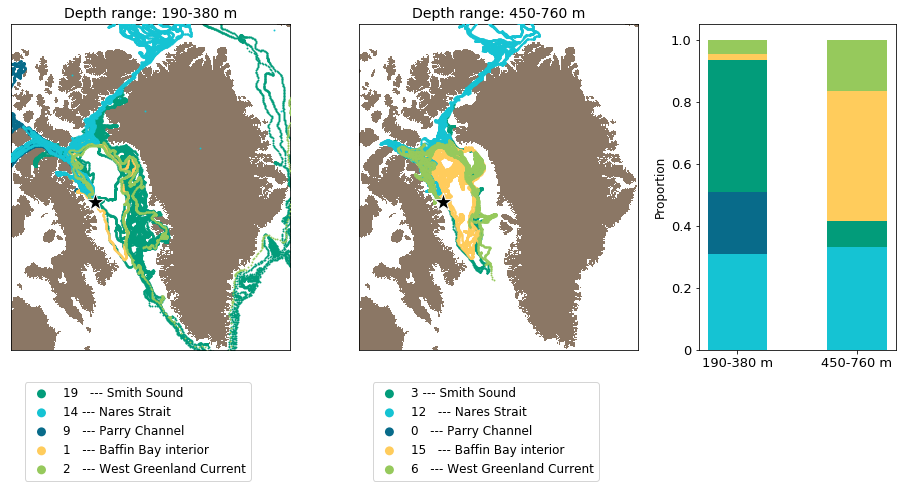

In [159]:
fig, ax = plt.subplots(1,3,figsize=(16,6), gridspec_kw = {'width_ratios':[3,3,2]})

zorders = [1, 3, 2, 2, 4]

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'l')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'l')

i=0
for depth in depth_classes:
    lon1 = lon_BB[:, np.logical_and(group_depth == depth,stn == 3)]
    lat1 = lat_BB[:, np.logical_and(group_depth == depth,stn == 3)]
    
    for run in range(0,9): 
        lon = lon1[:,run]
        lat = lat1[:,run]
        x, y = proj1(lon, lat)
        index_class = BB3_class[i,run]
        if i < 5:
            ax[0].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1]) 
        else:
            ax[1].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1])
    i+=1
    
x_sta,y_sta = proj1(lon1[0,0],lat1[0,0])
ax[0].scatter(x_sta,y_sta, s=350, zorder=5, marker='*', c='k', edgecolors='white')
ax[0].set_title('Depth range: 190-380 m', fontsize=14)
ax[1].scatter(x_sta,y_sta, s=350, zorder=5, marker='*', c='k', edgecolors='white')
ax[1].set_title('Depth range: 450-760 m', fontsize=14)

c1 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[0], edgecolors='none')
c2 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[1], edgecolors='none')
c3 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[2], edgecolors='none')
c4 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[3], edgecolors='none')
c5 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[4], edgecolors='none')

# Setup for bar plot:
N3 = 2
ind3 = np.arange(N3) 
width = 0.5

#BB3 bar plot:
ax[2].bar(ind3, class2_BB3, width, color=colors[1])
ax[2].bar(ind3, class3_BB3, width, bottom=class2_BB3, color=colors[2])
ax[2].bar(ind3, class1_BB3, width, bottom=np.add(class2_BB3, class3_BB3), color=colors[0])
ax[2].bar(ind3, class4_BB3, width, bottom=np.add(np.add(class3_BB3, class2_BB3), class1_BB3), color=colors[3])
ax[2].bar(ind3, class5_BB3, width, bottom=np.add(np.add(np.add(class4_BB3, class2_BB3), \
                                                              class1_BB3), class3_BB3), color=colors[4])
# axes labels:
ax[2].set_ylabel('Proportion', fontsize=12)
ax[2].set_xticks(ind3)
ax[2].set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0],fontsize=13)
ax[2].set_xticklabels(['190-380 m', '450-760 m'], fontsize=13)

ax[0].legend((c1, c2, c3, c4, c5), (str(BB3_class_sums[0,0]) + '   --- Smith Sound', \
                                    str(BB3_class_sums[0,1]) + ' --- Nares Strait', \
                                    str(BB3_class_sums[0,2]) + '   --- Parry Channel', \
                                    str(BB3_class_sums[0,3]) + '   --- Baffin Bay interior', \
                                    str(BB3_class_sums[0,4]) + '   --- West Greenland Current'), \
             loc = (0.05, -0.40), markerscale=10, fontsize=12)
ax[1].legend((c1, c2, c3, c4, c5), (str(BB3_class_sums[1,0]) + ' --- Smith Sound', \
                                    str(BB3_class_sums[1,1]) + '   --- Nares Strait', \
                                    str(BB3_class_sums[1,2]) + '   --- Parry Channel', \
                                    str(BB3_class_sums[1,3]) + '   --- Baffin Bay interior', \
                                    str(BB3_class_sums[1,4]) + '   --- West Greenland Current'), \
             loc = (0.05, -0.40), markerscale=10, fontsize=12)

# fig.savefig('BB3-tracks_20150808.png',bbox_inches='tight')